<a href="https://colab.research.google.com/github/Vikrampr/Play-Store-App-Review-Analysis/blob/main/Viram_Pratap_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# Importing the libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading Play store csv File

file_path ='/content/drive/MyDrive/Alma better/Capstone project EDA/Data/Copy of Play Store Data.csv'
play_store=pd.read_csv(file_path)

In [ ]:
# loading user reviews csv File

file_path ='/content/drive/MyDrive/Alma better/Capstone project EDA/Data/Copy of User Reviews.csv'
reviews=pd.read_csv(file_path)

**Performing basic checks on Play store data**

In [ ]:
play_store.shape

(10841, 13)

In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Performing basic checks on reviews data**

In [ ]:
reviews.shape

(64295, 5)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


**Cleaning the  Play store data**

**Cleaning empty cells and outliars**

In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store.shape

(10841, 13)

In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Checking for number of null values in each column

play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

*The above output shows number of null values present in each column. The maximum number of null values are present in the rating column.*

*We can use central tendency measures such as mean or median of the numeric feature column to replace the missing values*.

For Rating column:

In [ ]:
# Replacing the null values with the median in the rating column.

median_val =round(play_store['Rating'].median(),2)
#median_val
play_store['Rating'].fillna(median_val,inplace=True)

In [ ]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

*The above output shows that the null values present in the rating column have been replaced with the median and hence the count of null values is zero.*

**Checking for the outliers in the rating column.**
Acceptable range of ratings is between 1 to 5. Any rating below 1 and greater than 5 is not a valid rating.

In [ ]:
# Fetching all the rows which have rating greater than 5

play_store[play_store.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


*Life Made WI-Fi Touchscreen Photo Frame app has rating 19.0 which is an invalid rating.* 

In [ ]:
# Fetching all the rows which have rating less than 1

play_store[play_store.Rating<1]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


*No app in the Play store data has rating less than 1.*

In [ ]:
# Dropping the observation with an outliar

play_store.drop([10472], inplace=True)

In [ ]:
play_store.shape

(10840, 13)

*The shape (10840, 13) indicates one invalid observation  has been dropped from the dataset.*

Text(0.5, 0, 'Rating')

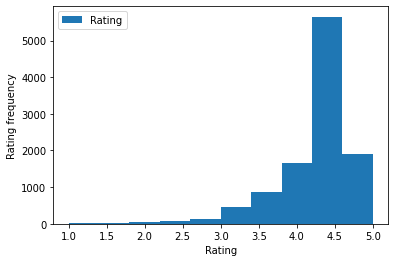

In [ ]:
# Ratings vizualization

play_store.plot(kind = 'hist')
plt.ylabel('Rating frequency')
plt.xlabel('Rating')

*The above graph shows that most frequent rating in the Play store is around 4.5*

*We can use central tendency measure such as mode of the categorical data column to replace the missing values*.

For type column:

In [ ]:
# Finding the mod values of column and replacing it null values.

mode_val_type = play_store['Type'].mode()[0]
#mode_val_type
play_store['Type'].fillna(mode_val_type,inplace=True)

In [ ]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

*The above output shows that the null value present in the type column has been replaced with the mode and hence the count of null values is zero*

For Current Ver column:

In [ ]:
# Finding the mod values of column and replacing it null values.

mode_val_cver = play_store['Current Ver'].mode()[0]
#mode_val_cver
play_store['Current Ver'].fillna(mode_val_cver,inplace=True)

In [ ]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

*The above output shows that the null value present in the Curr Ver column has been replaced with the mode and hence the count of null values is zero.*

For Android Ver column:

In [ ]:
# Finding the mod values of column and replacing it null values.

mode_val_andver = play_store['Android Ver'].mode()[0]
#mode_val_andver
play_store['Android Ver'].fillna(mode_val_andver,inplace=True)

In [ ]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

*The above output shows that the null value present in the Curr Ver column has been replaced with the mode and hence the count of null values is zero.*